In [1]:
from pandas_datareader import data  as pdr #修正
from datetime import date
from dateutil.relativedelta import relativedelta
import pandas as pd
import yfinance as yf #追加
yf.pdr_override() #追加

In [7]:
sp500 = pdr.get_data_yahoo('^GSPC',  '2013-01-01', '2022-12-31') 
voo = pdr.get_data_yahoo('VOO',  '2013-01-01', '2022-12-31') 

sp500 = sp500.drop(['Open', 'High','Low','Close','Volume'], axis=1)
voo = voo.drop(['Open', 'High','Low','Close','Volume'], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
sp500 = sp500.pct_change()
sp500 = sp500.fillna(0)
sp500 = sp500 + 1
sp500 = sp500.cumprod()

voo = voo.pct_change()
voo = voo.fillna(0)
voo = voo + 1
voo = voo.cumprod()

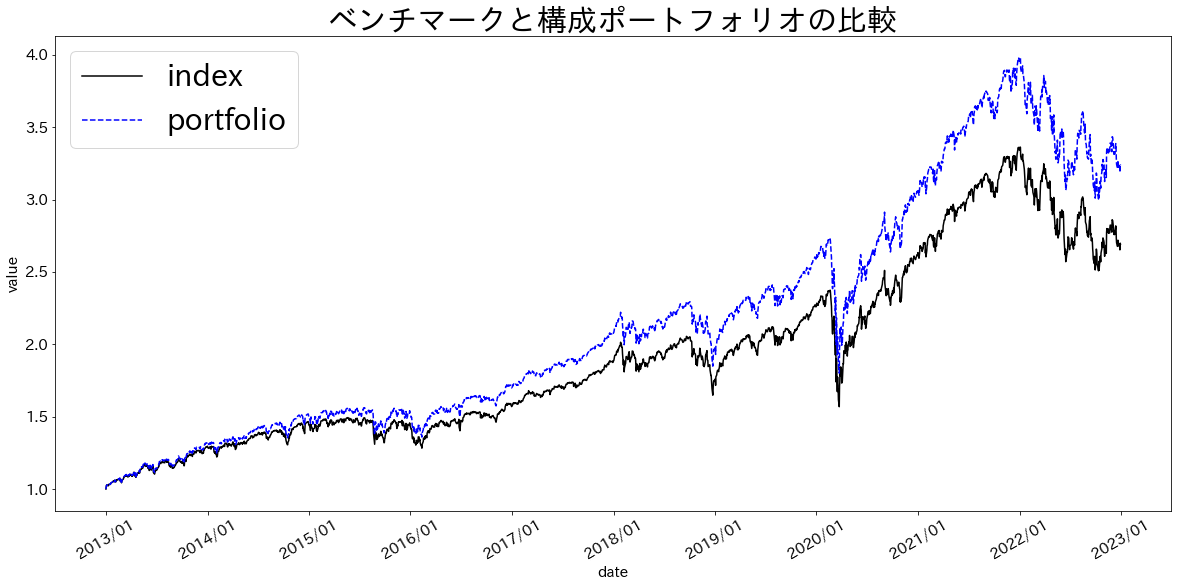

In [10]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import dates as mdates

heights = [4, 1]
fig = plt.figure(figsize=(20, 12))
spec = fig.add_gridspec(ncols=1, nrows=2,  height_ratios=heights)
ax = fig.add_subplot(spec[0, 0])
ax.plot(pd.to_datetime(sp500.index),sp500,c='k')
ax.plot(pd.to_datetime(voo.index),voo,c='b',linestyle="--")
ax.legend(labels=['sp500','voo'],fontsize=30)
ax.set_xlabel('date', size=15)
ax.set_ylabel('value', size=15)
ax.set_title('ベンチマークと構成ポートフォリオの比較', fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=30)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m'))